# Loan Application Status Prediction Project

## Data Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


Independent Variables:


- Loan_ID


- Gender


- Married


- Dependents


- Education


- Self_Employed


- ApplicantIncome


- CoapplicantIncome


- Loan_Amount


- Loan_Amount_Term


- Credit History


- Property_Area


Dependent Variable (Target Variable):


- Loan_Status


We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')



## Loading the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Checking the dimension of the dataset
df.shape

(614, 13)

In [7]:
# Statistical Summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Checking the null values of the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* The columns Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History contains null values.

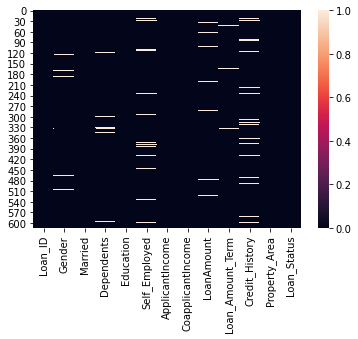

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [14]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [16]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [17]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## EDA

### Univariate analysis

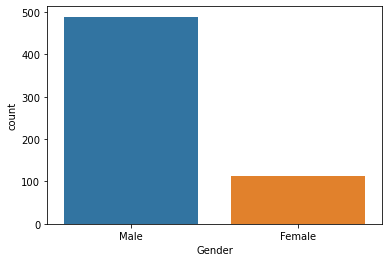

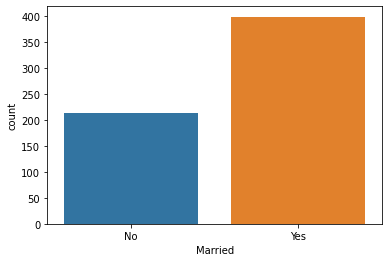

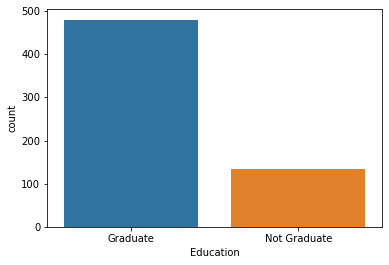

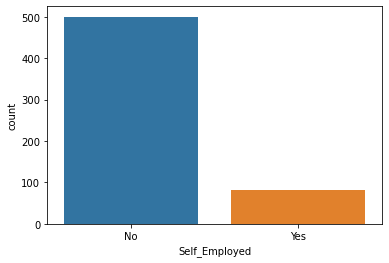

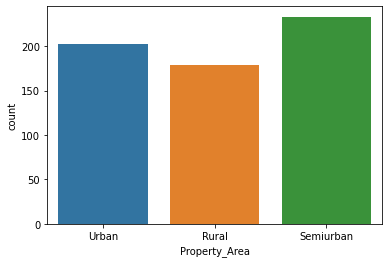

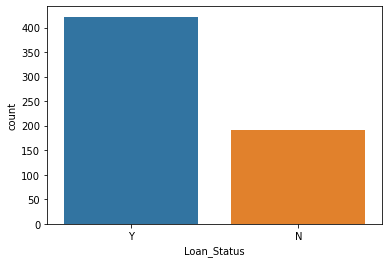

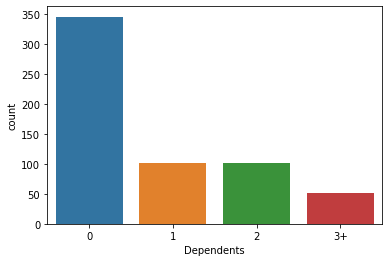

In [19]:
#Categorical Variables
var1=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for i in var1:
    sns.countplot(df[i])
    plt.show()

* Most of the loan applicants are Males compared to females.


* Most of the loan applicants are married.


* Around 480 applicants are graducates.Non graduated applicants are minimum in number.


* Among the applicants only 82 applicants are self employed.self employed people are minimum in number.


* Most of the applicants belong to semi urban area.applicants from urban areas are less in number.


* Most of the applicants got approval of loan,but 192 people's applications are rejected.


* Most of the applicants do not have dependents.Applicants below 50 in number have more than 3 dependents.

### Univariate Analysis- Numerical columns

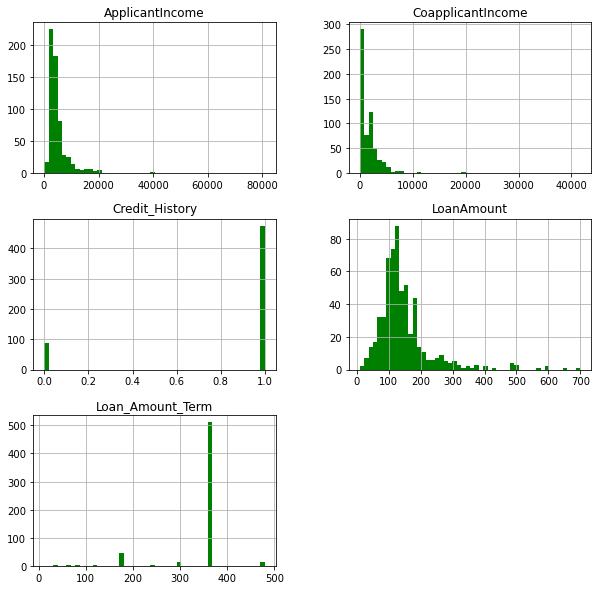

In [20]:
df.hist(bins=50,figsize=(10,10),color='g')
plt.show()

* Most of the applicant's income below 10000.


* Most of the co-aplicant's income is below 5000.


* Most of the applicant's have credit history.


* Loan Amount is between 9 to 700.Most of the applicant's loan amount is between 100-200.


* For most of the applicants Loan amount tern is 360.


### Bivariate Analysis

In [21]:
def plotcountgraph(var1):
    
    sns.set(font_scale=1.25)
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=var1, hue='Loan_Status', data=df,  palette="viridis")
    plt.setp(ax.get_xticklabels(), rotation=0)

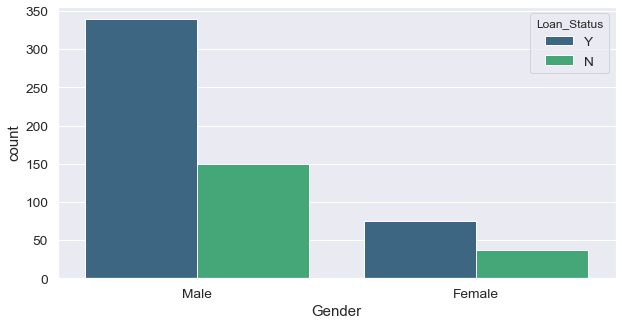

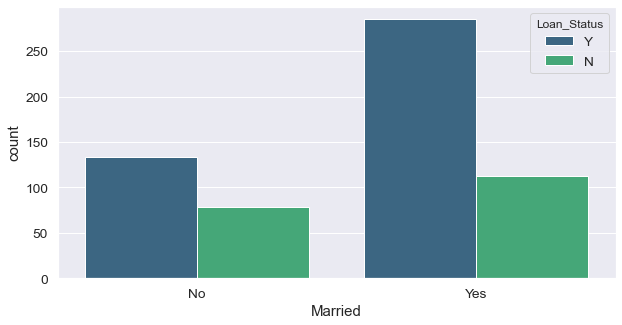

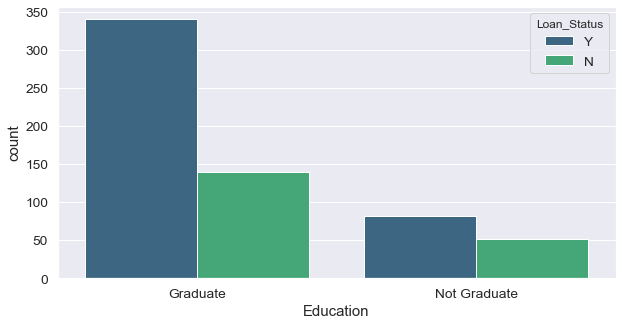

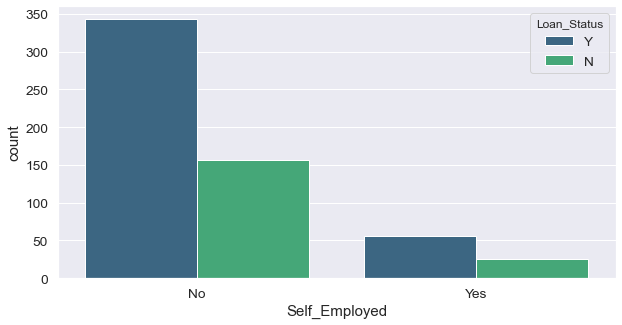

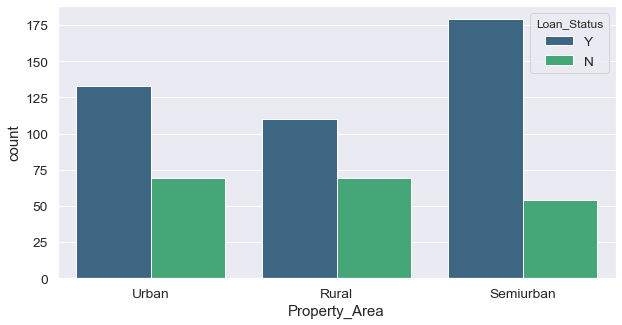

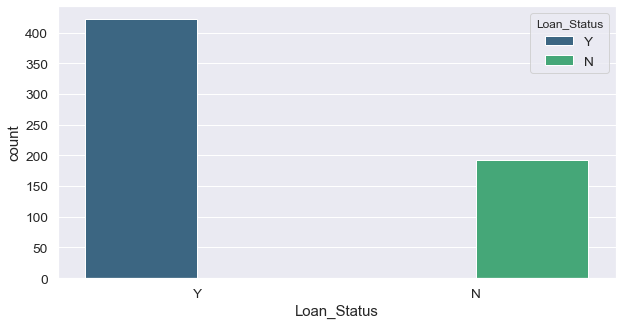

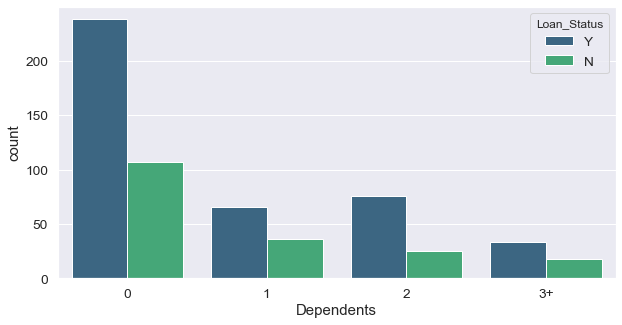

In [22]:
for i in var1:
    plotcountgraph(i)

* Among male and Female applicants,male applicants got approval more compared to female.The number of females who got approval of loan is less than 100.


* Both the married and non married applicants got approval of loan but married applicants who got loan is maximum in number.


* From the education graph we can see that graduated applicants who got approval of loan is maximum in number.


* From the graph of self_employed,we can observe that The number of self employed applicants who got loan is very less.


* Applicants from semi urban area who got loan is maximum in number compared to others.


* The  number of applicants who have 0 dependents got approval of loan is maximum compared to others.



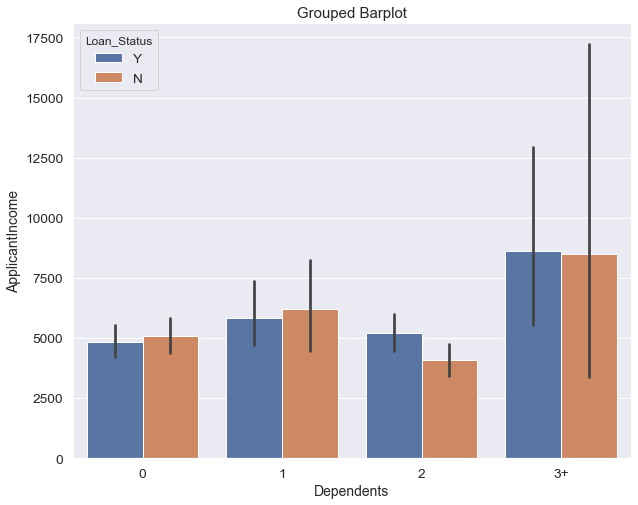

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x="Dependents",
            y="ApplicantIncome",
            hue="Loan_Status",
            data=df)
plt.ylabel("ApplicantIncome",size=14)
plt.xlabel("Dependents",size=14)
plt.title("Grouped Barplot",size=15)
plt.show()

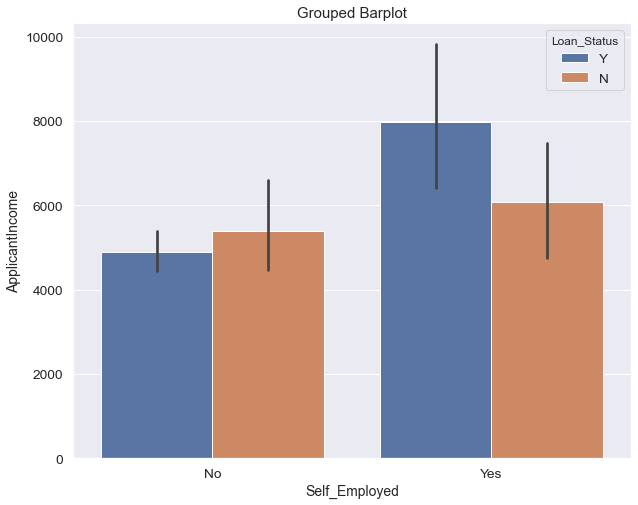

In [24]:
plt.figure(figsize=(10,8))
sns.barplot(x="Self_Employed",
            y="ApplicantIncome",
            hue="Loan_Status",
            data=df)
plt.ylabel("ApplicantIncome",size=14)
plt.xlabel("Self_Employed",size=14)
plt.title("Grouped Barplot",size=15)
plt.show()

* Self employed people whose income is nearly 8000 got approval of loan.

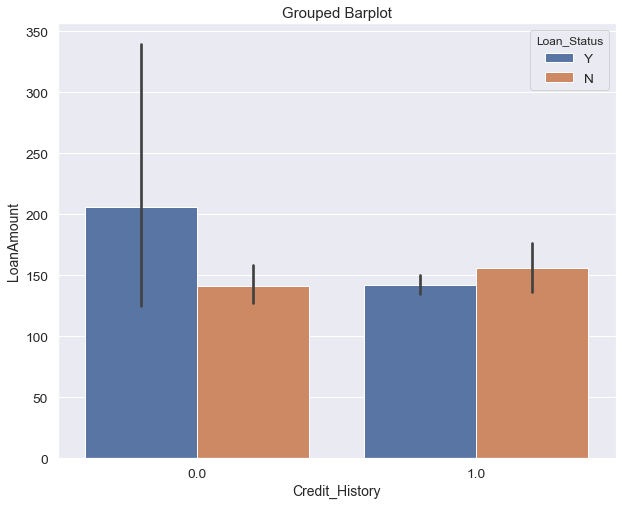

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x="Credit_History",
            y="LoanAmount",
            hue="Loan_Status",
            data=df)
plt.ylabel("LoanAmount",size=14)
plt.xlabel("Credit_History",size=14)
plt.title("Grouped Barplot",size=15)
plt.show()

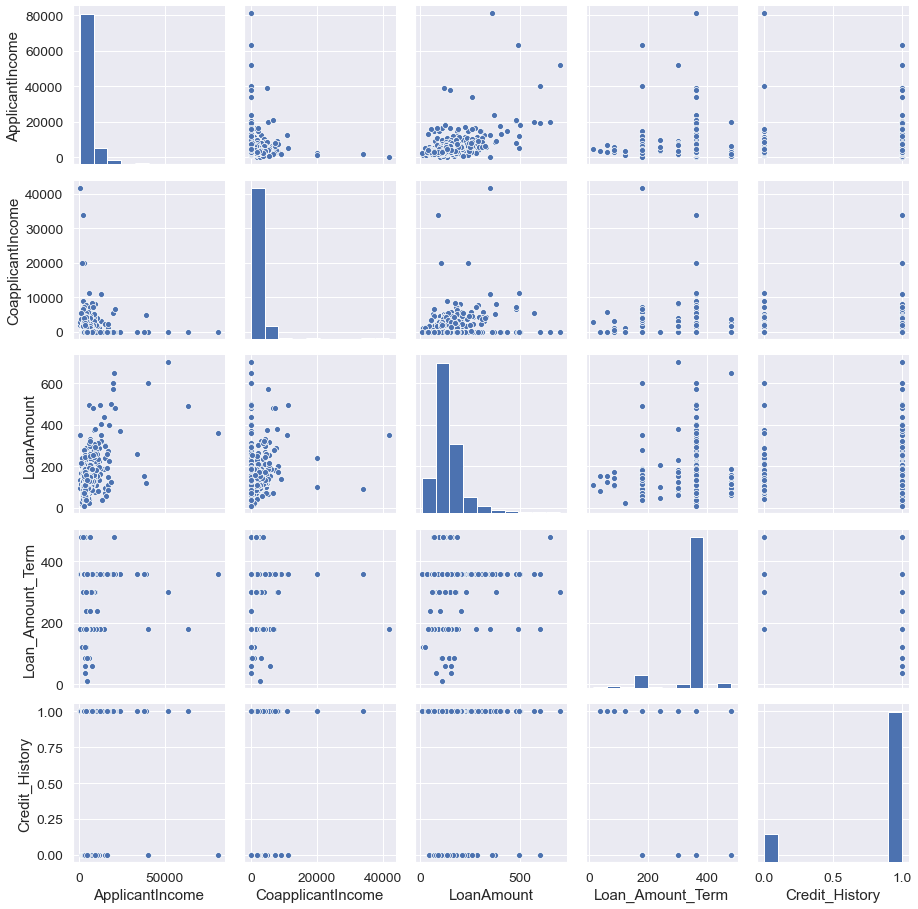

In [26]:
# Multivariate Analysis
sns.pairplot(df)
plt.show()

## Checking Correlation

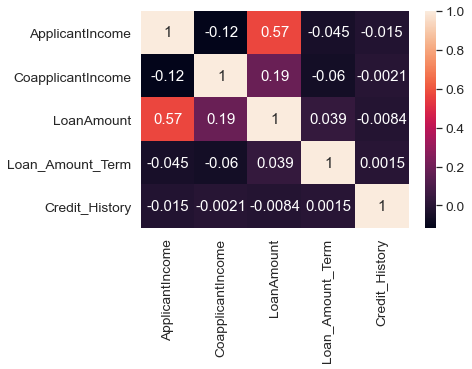

In [27]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

* Applicant Income and Loan Amount are highly correlated

* Coapplicant Income and Loan Amount are also correlated.

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imp=SimpleImputer(strategy='most_frequent')
var=['Gender','Married','Dependents','Self_Employed']
for i in var:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [30]:
imp=SimpleImputer(strategy='median')
var1=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in var1:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* So all NaN values are removed

In [32]:
df_float=df.select_dtypes(include=[np.number])

In [33]:
df_float

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


### Outliers detection

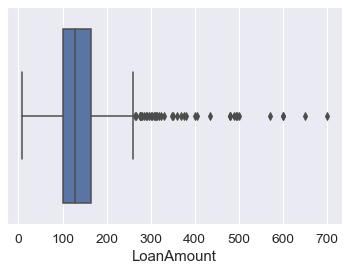

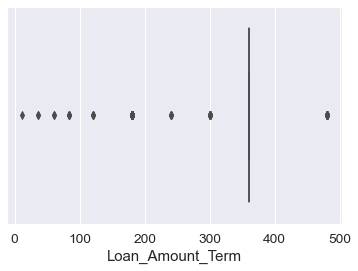

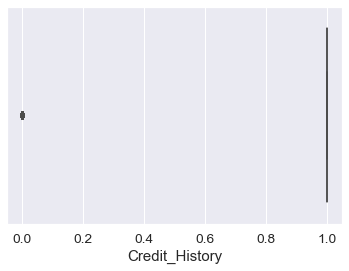

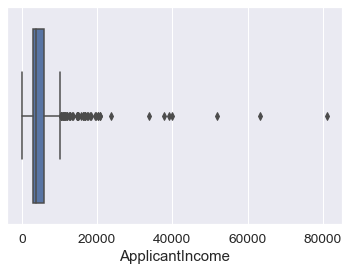

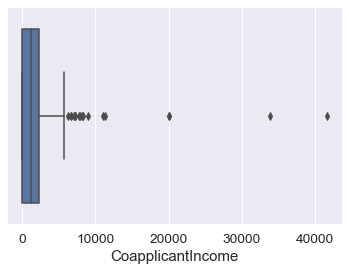

In [34]:
var=['LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']
for i in var:
    sns.boxplot(df[i])
    plt.show()

We can see the outliers in the dataset

In [35]:
from scipy.stats import zscore
z=np.abs(zscore(df_float))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 , 0.41173269],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 , 0.41173269],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 , 0.41173269],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 , 0.41173269],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 , 0.41173269],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 , 2.42876026]])

In [36]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [37]:
df=df[(z<3).all(axis=1)]

In [38]:
df.shape

(577, 13)

### Converting categorical columns into Numerical

Now we are going to covert categorical columns to numeric using LabelEncoding.

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()
for i in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
    df[i]=le.fit_transform(df[i])

In [41]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


Now we are going to drop Loan_ID as it is not needed for further analysis.

In [42]:
df.drop('Loan_ID',axis=1,inplace=True)

In [43]:
#seperating independent and target variable in X and y
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

### Distribution of Data along columns

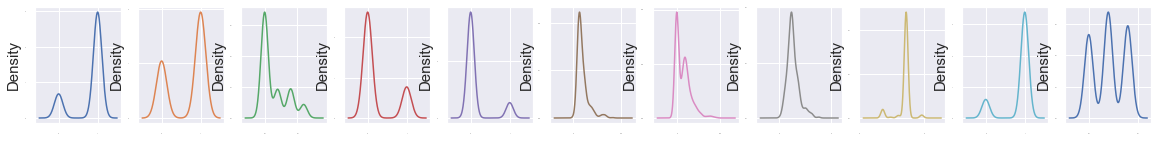

In [44]:
x.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(20,15))
plt.show()

### Checking Skewness

In [45]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

Skewness  is present in columns ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term.Remaining all columns are categorical.

### Removing Skewness

We are using power transform funcion to remove skewness.

In [46]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [47]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.155094
dtype: float64

In [48]:
x=df_new

### Scaling using StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [51]:
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.13078824,
         0.41851254,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.13078824,
        -2.38941464,  0.01546372]])

## Finding the best Random state

In [52]:
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)     

Best accuracy is 0.9051724137931034 on Random_state 12


## Train-Test Split

In [53]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((461, 11), (116, 11), (461,), (116,))

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

In [55]:
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('------------------------------------------')
    print('Accuracy Score')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix')
    print(confusion_matrix(y_test,predm))
    print('Classification Report')
    print(classification_report(y_test,predm))
    print('\n')

For LogisticRegression() :
------------------------------------------
Accuracy Score
0.9051724137931034
Confusion matrix
[[17 10]
 [ 1 88]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.90      0.99      0.94        89

    accuracy                           0.91       116
   macro avg       0.92      0.81      0.85       116
weighted avg       0.91      0.91      0.90       116



For GaussianNB() :
------------------------------------------
Accuracy Score
0.9224137931034483
Confusion matrix
[[19  8]
 [ 1 88]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.92      0.99      0.95        89

    accuracy                           0.92       116
   macro avg       0.93      0.85      0.88       116
weighted avg       0.92      0.92      0.92       116



For DecisionTreeClassifier

## Cross Validation

In [56]:
for m in model:
    scr=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

Cross validation score of LogisticRegression() is:
Score [0.81034483 0.79310345 0.79130435 0.86086957 0.84347826]
Cross validation score 0.8198200899550224
Standard deviation 0.027790198124777885


Cross validation score of GaussianNB() is:
Score [0.81034483 0.77586207 0.8        0.86956522 0.80869565]
Cross validation score 0.8128935532233882
Standard deviation 0.03089780068620149


Cross validation score of DecisionTreeClassifier() is:
Score [0.69827586 0.68103448 0.67826087 0.77391304 0.71304348]
Cross validation score 0.7089055472263868
Standard deviation 0.0348481843207155


Cross validation score of RandomForestClassifier() is:
Score [0.80172414 0.77586207 0.7826087  0.84347826 0.80869565]
Cross validation score 0.8024737631184408
Standard deviation 0.023763189383120473


Cross validation score of KNeighborsClassifier() is:
Score [0.76724138 0.75       0.7826087  0.84347826 0.77391304]
Cross validation score 0.7834482758620689
Standard deviation 0.0318643226996139


Cross validat

## AUC-ROC Curve

In [57]:
from sklearn.metrics import roc_curve,roc_auc_score

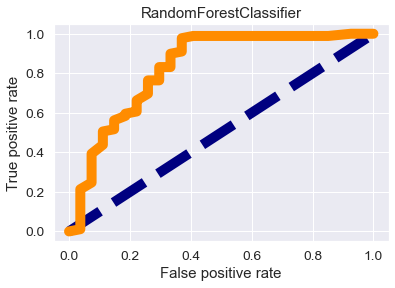

auc score 0.7698709945900957


In [58]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,label='RandomForestClassifier',color='darkorange',lw=10)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test)) 
print("auc score",auc_score)

## Hyper parameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Creating Parameters to pass in GridSearchCV
parameters={'criterion':['gini','entropy'],'max_depth':[1,10],'n_estimators':[1,100],'max_features':['auto','sqrt','log2'],'class_weight':['balanced','balanced_subsample']}

In [61]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [63]:
GCV.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [64]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [65]:
accuracy_score(y_test,GCV_pred)

0.8620689655172413

## Saving the best model

In [66]:
import pickle
filename='Loan_application_status.pkl'
pickle.dump(GCV.best_estimator_,open('Loan_application_status.pkl','wb'))

## Conclusion

In [67]:
loaded_model=pickle.load(open('Loan_application_status.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8620689655172413


In [68]:
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [69]:
df_con

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
111,1,1
112,1,1
113,0,1
114,1,1
